In [24]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
# opening concord data and save related columns in a dataframe
with open(r'../../data/tidy/concord.csv') as concord:
    df_concord=pd.read_csv(concord)
    df_concord_variable=df_concord.filter(items=['total cost','dencity(#parcel/ft)','1 phase','SAND','CLAY','BLD_AREA/length','TOTAL_VAL/length'])
    y = df_concord_variable['total cost']

In [26]:
#def a function to implement single variable linear regression:
def estimate_coef(x1, y):
    # number of observations/points
    n = np.size(x1)
 
    # mean of x1 and y vector
    m_x1 = np.mean(x1)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x1
    SS_x1y = np.sum(y*x1) - n*m_y*m_x1
    SS_x1x1 = np.sum(x1*x1) - n*m_x1*m_x1
 
    # calculating regression coefficients
    b_1 = SS_x1y / SS_x1x1
    b_0 = m_y - b_1*m_x1
 
    return (b_0, b_1)
 
def plot_regression_line(x1, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x1, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x1
 
    # plotting the regression line
    plt.plot(x1, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x1')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def implement_single_variable_linear_regression(x1):
 
    # estimating coefficients
    b = estimate_coef(x1, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x1, y, b)
 
if __name__ == "__implement_single_variable_linear_regression__":
    implement_single_variable_linear_regression(x1)

Estimated coefficients:
b_0 = 156.28500977640965            
b_1 = -28.920821395920314


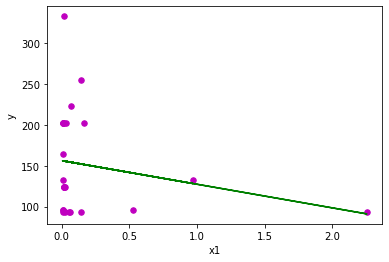

In [27]:
#implement single variable linear regression for dencity(#parcel/ft)
implement_single_variable_linear_regression(x1= df_concord_variable['dencity(#parcel/ft)'])

Estimated coefficients:
b_0 = 145.95860383487008            
b_1 = 0.08351262157230525


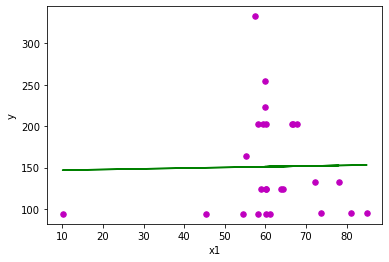

In [28]:
#implement single variable linear regression for SAND
implement_single_variable_linear_regression(x1 = df_concord_variable['SAND'])

Estimated coefficients:
b_0 = 177.426            
b_1 = -62.246909090909114


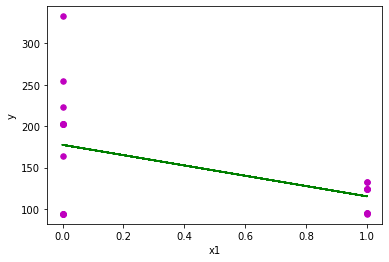

In [29]:
#implement single variable linear regression for 1 phase
implement_single_variable_linear_regression(x1 = df_concord_variable['1 phase'])

In [30]:
#def a function to implement multi variable linear regression:
def implement_multivariable_regression(X):
    #Splitting the dataset
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
    #Fitting the Multiple Linear Regression model
    mlr = LinearRegression()  
    mlr.fit(X, y)
    #Intercept and Coefficient
    print("Intercept: ", mlr.intercept_)
    print("Coefficients:", list(zip(X, mlr.coef_)))
    #Prediction of test set
    y_pred_mlr= mlr.predict(x_test)
    #Predicted values
    print("Prediction for test set: {}".format(y_pred_mlr))
    #Actual value and the predicted value
    mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
    #slr_diff.head()
    #Model Evaluation
    from sklearn import metrics
    meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
    meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
    print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)
    print('Root Mean Square Error:', rootMeanSqErr)

In [31]:
#implement multi variable linear regression for density, 1 phase and SAND
implement_multivariable_regression(X = df_concord_variable[['dencity(#parcel/ft)','1 phase', 'SAND']])

Intercept:  113.49950680869948
Coefficients: [('dencity(#parcel/ft)', -34.83030080009607), ('1 phase', -76.98804934713513), ('SAND', 1.2435156638733544)]
Prediction for test set: [ 90.9767657  196.16341861 137.1553382  187.98148694 110.68797397
 190.63046449 186.16099833 197.23402359]
R squared: 37.13
Mean Absolute Error: 24.217897553588294
Mean Square Error: 1411.3888346291417
Root Mean Square Error: 37.56845531332293


In [32]:
#implement multi variable linear regression for density, 1 phase and CLAY
implement_multivariable_regression(X = df_concord_variable[['dencity(#parcel/ft)','1 phase', 'CLAY']])

Intercept:  159.2407857223377
Coefficients: [('dencity(#parcel/ft)', -31.83660882486031), ('1 phase', -58.0989044122099), ('CLAY', 5.3712835340607095)]
Prediction for test set: [110.60234195 181.76154606 110.57712719 188.01417784 129.63606465
 177.01064584 186.77741049 180.77625989]
R squared: 33.02
Mean Absolute Error: 27.020481167630063
Mean Square Error: 1405.56284074097
Root Mean Square Error: 37.49083675701264


In [33]:
#implement multi variable linear regression for BLD_AREA/length, 1 phase and SAND
implement_multivariable_regression(X = df_concord_variable[['BLD_AREA/length','1 phase', 'SAND']])

Intercept:  116.66317704705271
Coefficients: [('BLD_AREA/length', -0.006639017791512524), ('1 phase', -74.82965426165468), ('SAND', 1.1701721840972696)]
Prediction for test set: [ 93.39262659 194.50894775 136.32988595 186.07844498 111.63645965
 190.21235545 186.18571693 196.04412652]
R squared: 35.78
Mean Absolute Error: 23.861012256118833
Mean Square Error: 1360.5078703474862
Root Mean Square Error: 36.88506297063198


In [34]:
#implement multi variable linear regression for BLD_AREA/length, 1 phase and CLAY
implement_multivariable_regression(X = df_concord_variable[['BLD_AREA/length','1 phase', 'CLAY']])

Intercept:  159.75526458103226
Coefficients: [('BLD_AREA/length', -0.006256952944493666), ('1 phase', -57.133698345419255), ('CLAY', 5.092199489916641)]
Prediction for test set: [111.83863365 181.15119726 111.36209527 186.39355025 129.62521112
 177.39678477 186.91619593 180.70946988]
R squared: 32.13
Mean Absolute Error: 27.08823030585916
Mean Square Error: 1376.7582777307675
Root Mean Square Error: 37.10469347307383
